                  Date   Time    Open    High     Low   Close
Datetime                                                     
2008-12-02  12/02/2008  00:00  4664.5  4898.5  4624.5  4869.0
2008-12-03  12/03/2008  00:00  4834.5  4948.0  4698.0  4938.0
2008-12-04  12/04/2008  00:00  4878.0  5056.5  4746.5  4801.0
2008-12-05  12/05/2008  00:00  4816.5  4876.5  4642.0  4846.0
2008-12-08  12/08/2008  00:00  4947.5  5096.0  4927.0  5043.5
2008-12-09  12/09/2008  00:00  5003.5  5172.0  4942.5  5042.5
2008-12-10  12/10/2008  00:00  5108.0  5164.5  5062.0  5146.0
2008-12-11  12/11/2008  00:00  5109.5  5143.5  5025.0  5037.5
2008-12-12  12/12/2008  00:00  4897.5  5076.0  4839.5  5052.0
2008-12-15  12/15/2008  00:00  5090.5  5115.5  4934.5  4993.0
2008-12-16  12/16/2008  00:00  4999.5  5167.5  4962.5  5143.5
2008-12-17  12/17/2008  00:00  5124.0  5124.0  4955.5  5038.5
2008-12-18  12/18/2008  00:00  5052.0  5105.0  4970.5  5008.0
2008-12-19  12/19/2008  00:00  5019.0  5102.5  4958.0  4971.0
2008-12-

KeyError: 'Down Trend'

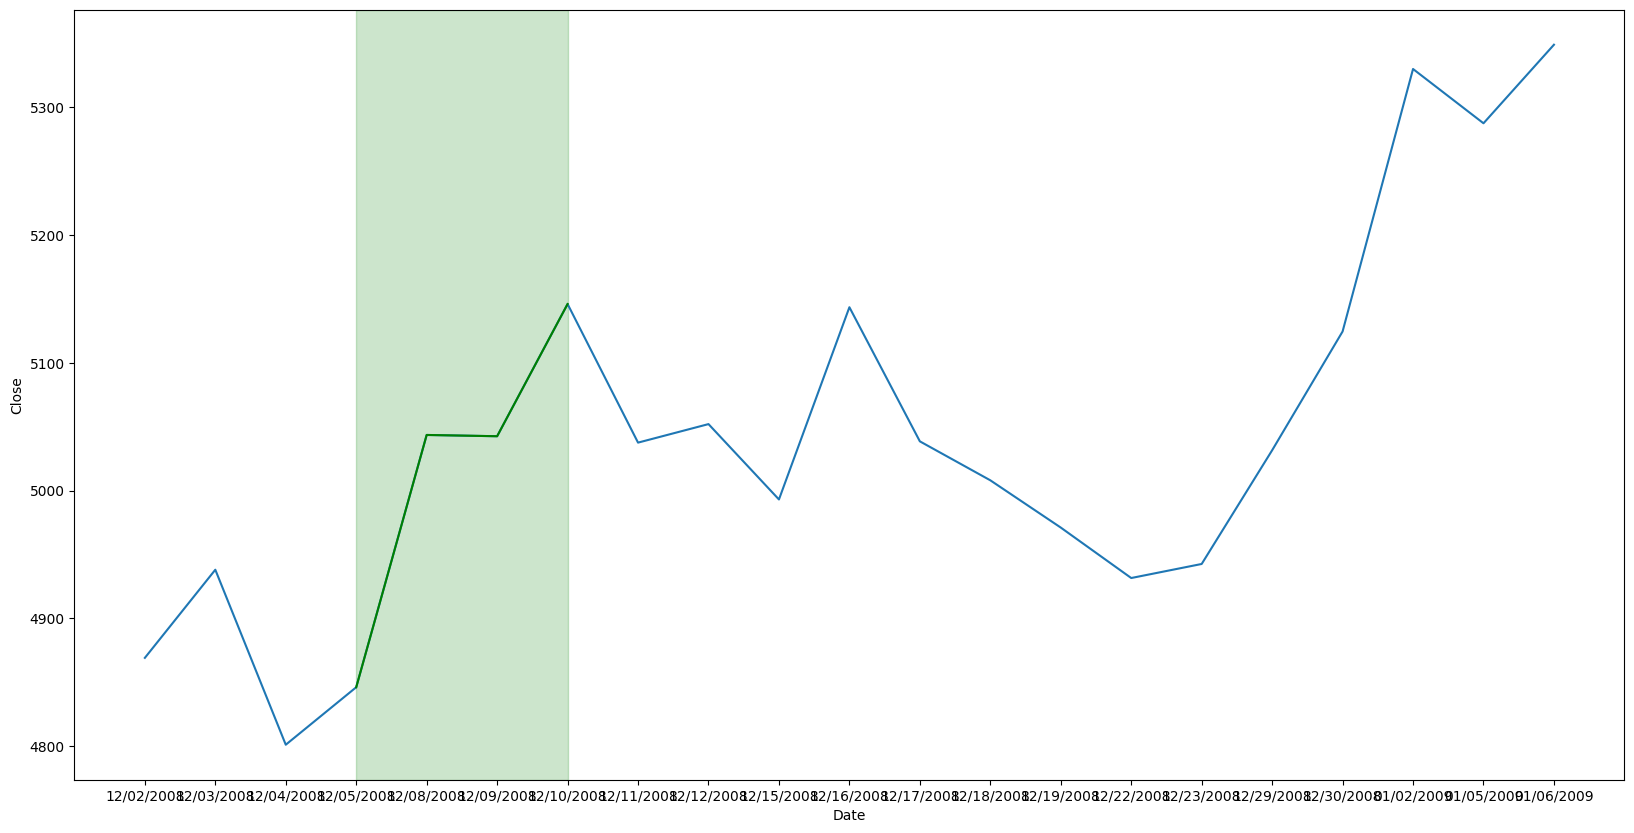

In [12]:
import trendet
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

begin=datetime.datetime(2008,12,2,0,0,0,0)
end=datetime.datetime(2009,1,6,0,0,0,0)


dax = pandas.read_csv('datasets/daxHour.csv')

dax['Datetime'] = pandas.to_datetime(dax['Date'] + " "+ dax['Time'])

dax.set_index('Datetime', inplace=True)

dax = dax[begin:end]

print(dax)

res = trendet.identify_df_trends(df=dax, column='Close')

res.reset_index(inplace=True)


plt.figure(figsize=(20, 10))

ax = sns.lineplot(x=res['Date'], y=res['Close'])

labels = res['Up Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=res[res['Up Trend'] == label]['Date'],
                    y=res[res['Up Trend'] == label]['Close'],
                    color='green')

    ax.axvspan(res[res['Up Trend'] == label]['Date'].iloc[0],
                res[res['Up Trend'] == label]['Date'].iloc[-1],
                alpha=0.2,
                color='green')

labels = res['Down Trend'].dropna().unique().tolist()

for label in labels:
    sns.lineplot(x=res[res['Down Trend'] == label]['Date'],
                    y=res[res['Down Trend'] == label]['Close'],
                    color='red')

    ax.axvspan(res[res['Down Trend'] == label]['Date'].iloc[0],
                res[res['Down Trend'] == label]['Date'].iloc[-1],
                alpha=0.2,
                color='red')

plt.show()
